In [1]:
# Importing modules
import numpy as np
from data_loader import load_npy
import matplotlib.pyplot as plt
from pathlib import Path

# Local Modules
import augmentation_dev as augmentation
from preprocessing import get_dataset
from utilities import save_npy_v2
import statistics

In [2]:
def print_sample(img_arr, ann_arr, sample_size, num_class):
    index = -1
    j = 1
    plt.figure(figsize=(12,3*sample_size))
    for i in range(sample_size):
        plt.subplot(sample_size,4,j)
        plt.imshow(img_arr[i,:,:,0:3]/255)
        plt.subplot(sample_size,4,j+1)
        plt.imshow(img_arr[i,:,:,3:6]/255)
        plt.subplot(sample_size,4,j+2)
        plt.imshow(img_arr[i,:,:,6:9]/255)
        plt.subplot(sample_size,4,j+3)
        plt.imshow(ann_arr[i,:,:,0], vmin=0, vmax=num_class)
        j += 4
    plt.show()

### Defining image array

In [3]:
# Combing 2 sets of images

# DATASET_PATH_1 = Path("C:/Users/josep/Documents/work/crate_classifier_dev/images/images_1")
# DATASET_PATH_2 = Path("C:/Users/josep/Documents/work/crate_classifier_dev/images/images_1")

# img_arr_1, ann_arr_1 = get_dataset(DATASET_PATH_1, num_exp=3)
# img_arr_2, ann_arr_2 = get_dataset(DATASET_PATH_2, num_exp=3)

# img_arr = np.concatenate((img_arr_1, img_arr_2), axis= 0)
# ann_arr = np.concatenate((ann_arr_1, ann_arr_2), axis= 0)

# print_sample(img_arr, ann_arr, sample_size=2)

Creating dataset: 100%|██████████| 3/3 [00:00<00:00,  4.65it/s]


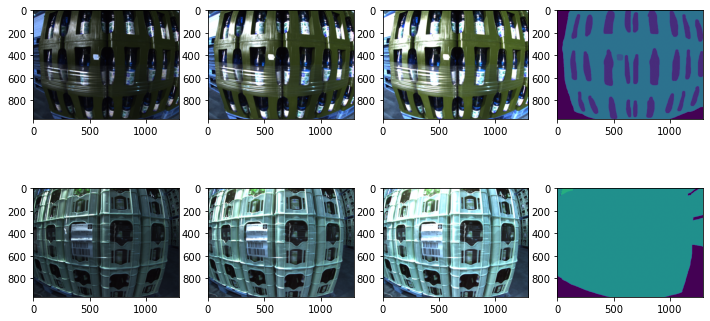

In [4]:
# Single set of images
# For images_3, dataset is created in 2 parts due to memory constrains

DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier_dev/images/img_3_test")

# # Without class_8
# DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier_dev/images/without_class_8")

# # With class_8
# DATASET_PATH = Path("C:/Users/josep/Documents/work/crate_classifier_dev/images/with_class_8")

img_arr, ann_arr = get_dataset(DATASET_PATH, num_exp=3)
print_sample(img_arr, ann_arr, sample_size=2, num_class=8)

In [5]:
print(f"Img array shape: {img_arr.shape}")
print(f"Ann array shape: {ann_arr.shape}")

Img array shape: (3, 964, 1292, 9)
Ann array shape: (3, 964, 1292, 1)


### Creating augmented images

In [6]:
OUTPUT_PATH = "C:/Users/josep/Documents/work/crate_classifier_dev/outputs/images_augmented"

In [7]:
aug_obj = augmentation.Augmenter(img_arr, ann_arr, out_h=128, out_w=128, num_exp=3, out_dir= OUTPUT_PATH)

output folder created


In [8]:
aug_img, aug_ann = aug_obj.generate_aug(num_gen=10, write_img=True)

100%|██████████| 10/10 [00:03<00:00,  2.90it/s]


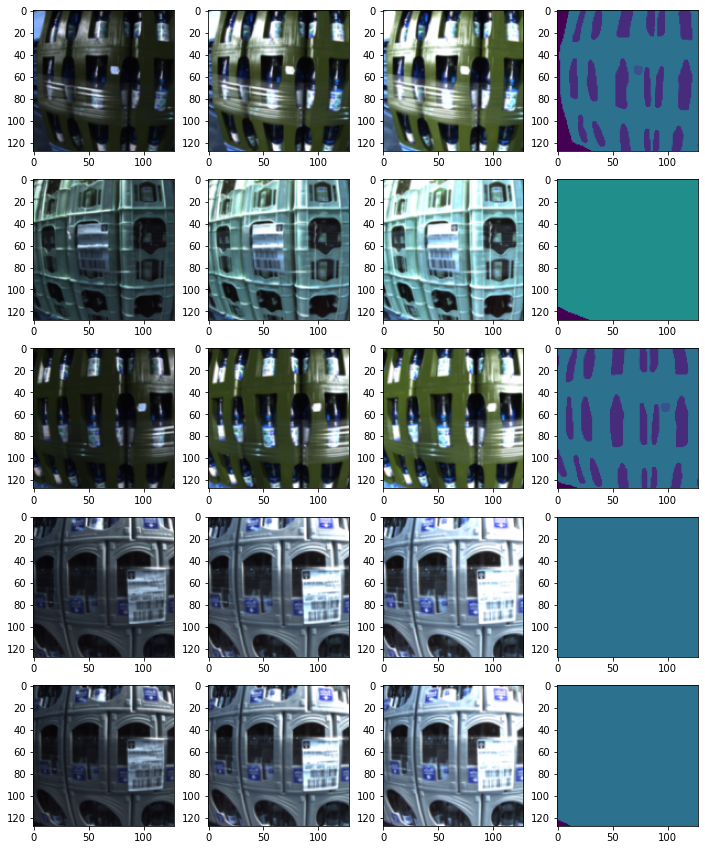

In [9]:
print_sample(aug_img, aug_ann, 5, num_class=8)

In [10]:
# DATASET_OUT = Path("C:/Users/josep/Documents/work/crate_classifier_dev/outputs/datasets")
save_npy_v2(aug_img, Path(OUTPUT_PATH)/"dataset_images_aug")
save_npy_v2(aug_ann, Path(OUTPUT_PATH)/"dataset_annots_aug")

In [11]:
# sample = load_npy("C:/Users/josep/Documents/work/crate_classifier_dev/outputs/images_augmented/img_094_mask.npy")
# plt.imshow(sample[:,:,0])

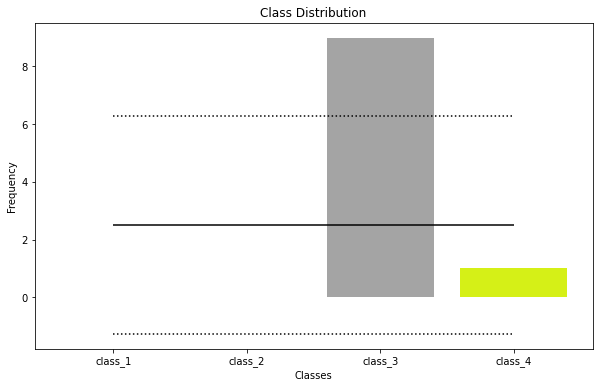

In [12]:
annots = aug_ann
statistics.show_class_dist(annots)